In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import matplotlib.pyplot as ploting
import seaborn as sns
cmap = ['vlag', 'gnuplot_r', 'Purples_r', 'Oranges', 'Greys', 'Spectral_r', 'tab20_r', 'RdYlBu', 'Reds_r', 'viridis', 'PuBu', 'RdPu_r', 'Wistia', 'Wistia_r', 'flag', 'PuOr', 'Set1_r', 'YlGnBu_r', 'autumn_r', 'bwr_r', 'Paired', 'RdYlGn', 'hot_r', 'PiYG_r', 'icefire_r', 'Set2_r', 'PuRd', 'Blues_r', 'OrRd', 'pink_r', 'gray_r', 'gist_yarg_r', 'gnuplot2_r', 'Dark2_r', 'rocket', 'gist_rainbow', 'BuPu_r', 'bwr','BuGn', 'PRGn_r', 'prism', 'gnuplot', 'YlGn', 'plasma', 'Pastel1_r', 'tab20c_r', 'PiYG', 'terrain_r','ocean', 'GnBu_r', 'Blues', 'brg_r', 'binary_r', 'gist_gray', 'rocket_r', 'gist_earth', 'cubehelix_r','Pastel2_r', 'Set3', 'Purples', 'afmhot_r', 'icefire', 'cool_r', 'seismic', 'gist_gray_r', 'flag_r','RdYlGn_r', 'Set2', 'Set3_r', 'jet', 'gray', 'rainbow_r', 'nipy_spectral', 'Reds', 'gist_heat_r', 'Dark2', 'inferno_r', 'viridis_r', 'spring', 'Accent', 'cividis_r', 'tab20b_r', 'terrain', 'YlOrBr', 'rainbow', 'magma', 'gist_ncar_r', 'gist_stern', 'Oranges_r', 'winter', 'bone_r', 'BuPu', 'magma_r', 'RdBu', 'binary', 'ocean_r', 'RdGy_r', 'gist_rainbow_r', 'BrBG_r', 'inferno', 'Accent_r', 'PuOr_r', 'YlOrBr_r', 'Paired_r', 'pink', 'Greens', 'plasma_r', 'tab20c', 'tab10_r', 'GnBu', 'hsv', 'YlOrRd', 'winter_r', 'Set1', 'YlOrRd_r', 'PuRd_r', 'prism_r', 'mako', 'cividis', 'CMRmap', 'RdGy', 'summer_r', 'coolwarm_r', 'YlGn_r', 'bone', 'gnuplot2', 'BuGn_r', 'PuBuGn', 'copper_r', 'tab20b', 'RdBu_r', 'PRGn', 'jet_r', 'gist_ncar', 'PuBu_r', 'Pastel1', 'hot', 'copper', 'YlGnBu', 'brg', 'Pastel2', 'tab10', 'Greens_r', 'cubehelix', 'Greys_r', 'spring_r', 'tab20', 'gist_stern_r', 'vlag_r', 'PuBuGn_r', 'gist_earth_r', 'mako_r', 'cool', 'hsv_r','nipy_spectral_r', 'gist_yarg', 'OrRd_r', 'seismic_r', 'afmhot', 'summer', 'coolwarm', 'CMRmap_r', 'Spectral', 'BrBG', 'gist_heat', 'RdPu', 'RdYlBu_r', 'autumn']

In [ ]:
import glob        #  import glob aglob term is define pattern matching
import random      #  IMporting random for generating random colors 
import os          #  Importing OS . 
data = [f for f in glob.glob('/content/gdrive/MyDrive/vishal/gait-in-parkinsons-disease-1.0.0' + "/**/*", recursive=True) if not os.path.isdir(f)]
# read all the image in our dataset 

In [ ]:
len(data)

312

## Reading Extracted Features

In [ ]:
import pandas as pd
Features = pd.read_csv('/content/gdrive/MyDrive/vishal/features.csv' , nrows = 141)
classes = pd.read_csv('/content/gdrive/MyDrive/vishal/classes.csv',names=["cals"] , nrows=141)

In [ ]:
# Getting the Information about the dataset here we are using the dataset in which the features is already extracted using Feature extraction Code written in matlab.
Features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Columns: 419 entries, Height to Features417
dtypes: float64(419)
memory usage: 461.7 KB


Here we are Filling the missing features with meadian value

In [ ]:
# Using the inbuilt feature filling meathod it fill the missing value using median.
Features = Features.fillna(Features.median())

In [ ]:
# Here we are checking for null values in the dataset - Classes
classes.isnull().sum() 

cals    0
dtype: int64

In [ ]:
import numpy as np
# Features.replace("NaN",np.nan, inplace=True)

In [ ]:
# Here we are using the concat function of pandas for concatnation of two dataframe
df = pd.concat([Features, classes], axis=1)
# reseting the index of the dataframe 
df = df.reset_index()

In [ ]:
# Checking If there is having any infinite value or not 
np.all(np.isfinite(df))

True

In [ ]:
# Imputing the values with median
df = df.fillna(df.median())

In [ ]:
# getting the inforamation about the final dataframe it tells we have 419 columns having 
# the value with datatype float64 and 2 columns having the data with datatype int
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Columns: 421 entries, index to cals
dtypes: float64(419), int64(2)
memory usage: 463.9 KB


In [ ]:
# taking the dependent column in Y
Y = df["cals"]
# taking the Independent column in X
X = df.drop(["cals"] , axis = 1)

This is the function for the ROC Curve Plot 

In [ ]:
import matplotlib.pyplot as pylot
pylot.figure(figsize=(8,6))
### Predicting the Y predict in by giving the X_text_final
from sklearn.metrics import roc_curve

def roc_curve_pylot(y_tst , y_pred , name):
    fpr = {}### False positive Rate
    tpr = {}### True Positive Raate
    thresh ={}
    ### Here we are giving the class name 
    class_names = ['PD' , 'CO']
    ### here there are 3 classes in the sentiment
    n_class = 2
    
    for i in range(n_class):  
        ### here we are Getting the curve  
        fpr[i], tpr[i], thresh[i] = roc_curve(y_tst , y_pred, pos_label=i)

    ### Getting  labels    
    pylot.plot(fpr[0], tpr[0] ,color='orange', label='PD')
    ### Here we are giving the color of Normal line orange
    pylot.plot(fpr[1], tpr[1] ,color='green', label='CO')
    ### Here we are giving the color of Generic line green

    pylot.title(f'Binary ROC curve for {name}')
    ### Setting the tittle of curve
    pylot.xlabel('False Positive Rate')
    ### Setting the X-label
    pylot.ylabel('True Positive rate')
    ### Setting the Y-tittle
    pylot.legend(loc='best')

<Figure size 576x432 with 0 Axes>

**This is the code for Generating the report that include Confusion matrix , classification report , accuracy , precession ,recall, F1score .**

---



---



In [ ]:
from sklearn.metrics import confusion_matrix# Basic liberary for result showing
from sklearn.metrics import classification_report# Basic liberary for model building   
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score 
import random

def report_generator(y_tst , y_pred , title="Testing" , rnd=2):                                                # defining the report Generation function
    '''This is a tailored function for producing reports and obtaining confusion matrices.'''

    sentiment_classes = ['Healthy','PD']
    print(" ")
    ploting.figure(figsize=(8,6))
    ### for the figure size we are setting the size
    sns.heatmap(confusion_matrix(y_tst, y_pred) ,cmap=random.choice(cmap), fmt = 'd' ,annot = True , xticklabels=sentiment_classes,yticklabels=sentiment_classes)
    ploting.title(f'Confusion matrix {title}', fontsize=16)
    # Setting the tittle of the plot
    ploting.xlabel('Actual label', fontsize=12)
    ### for the plot we are giving the Xlabel
    ploting.ylabel('Predicted label', fontsize=12)
    ### for the plot we are giving the Ylabel
    print(classification_report(y_tst, y_pred))
    ### Generating the classification report
    print(" ")
    ### for the plot we are giving the Accuracy
    accuracy = accuracy_score(y_tst, y_pred)
    ### for the plot we are giving the accuracy
    print("  ")
    print("="*50)
    print(f'{title} Accuracy   : {round(accuracy , rnd)}')
    precision = precision_score(y_tst, y_pred,average='weighted')#estimating precision__score_
    recall = recall_score(y_tst, y_pred,average='weighted')#estimating recall___score
    f1score = f1_score(y_tst, y_pred,average='weighted')#esimaating f1_score
    print(f'{title} precision  : {round(precision , rnd)}')
    print(f'{title} recall     : {round(recall , rnd)}')
    print(f'{title} f1score    : {round(f1score , rnd)}')
    print("="*50)
    print("  ")

Splitting the data into X_train and y_train

In [ ]:
from sklearn.model_selection import train_test_split # For spliting the data into train test --> To verify the model accuracy
X_trn, X_tst, y_trn, y_tst = train_test_split(X, Y, test_size=0.2, random_state=42)                    

Here we are scaling the data using standard scaler.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaling = StandardScaler().fit(X)#scaling the training set
X_trn = scaling.transform(X_trn)#transforming the scaler in training set
X_tst = scaling.transform(X_tst)#transforming the scaler in training set

Let's apply our Model to the Extracted Features and Classes

---



---



# SOFT VOTING CLASSIFIER (SVE)
**Five model integrated voting classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier           # importing the random forest classifier as it's our First voting classifier
from sklearn.svm import SVC                                   # importing the SVC classifier as it's our second voting classifier
from sklearn.linear_model import LogisticRegression           # importing the Logestic regression classifier as it's our Third voting classifier
from sklearn.naive_bayes import GaussianNB                    # importing the Guassian NB classifier as it's our forth voting classifier
import lightgbm as lgb                                        # importing the LightGBM classifier as it's our Fifth voting classifier

In [ ]:
from sklearn.ensemble import VotingClassifier                 # Importing the main Voting classifier that is used ot conacatnate the model
voting_clf_1 = RandomForestClassifier(random_state=0)
voting_clf_2 = SVC(probability=True)
voting_clf_3 = LogisticRegression()
voting_clf_4 = GaussianNB()
voting_clf_5 = lgb.LGBMClassifier()

evoting_clf_1 = VotingClassifier(estimators=[('RF', voting_clf_1), ('SVM', voting_clf_2), ('LR', voting_clf_3) , ('NB' , voting_clf_4) , ('LGBM' , voting_clf_5)], voting='soft')
evoting_clf_1.fit(X_trn, y_trn)
predictions = evoting_clf_1.predict(X_tst)

 
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.93      0.96        14

    accuracy                           0.97        29
   macro avg       0.97      0.96      0.97        29
weighted avg       0.97      0.97      0.97        29

 
  
Testing Accuracy   : 0.96552
Testing precision  : 0.96767
Testing recall     : 0.96552
Testing f1score    : 0.96543
  


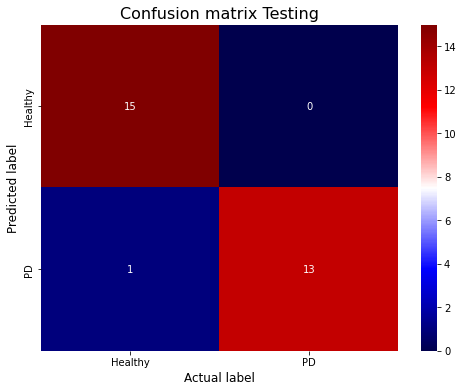

In [ ]:
# Generating the classification report , showing Precession , accuracy , f1score and recall for the testing part
report_generator(y_tst , predictions , 'Testing' , 5)

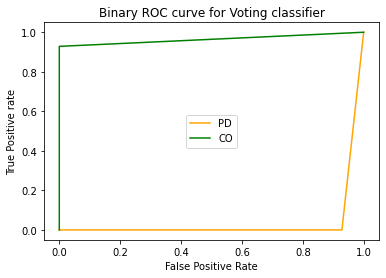

In [ ]:
roc_curve_pylot(y_tst , predictions , "Voting classifier")

 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        62

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112

 
  
Training Accuracy   : 1.0
Training precision  : 1.0
Training recall     : 1.0
Training f1score    : 1.0
  


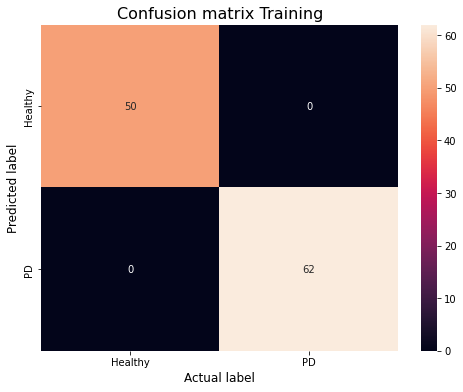

In [ ]:
# Generating the classification report , showing Precession , accuracy , f1score and recall for the Training part
predict = evoting_clf_1.predict(X_trn)
report_generator(y_trn , predict , 'Training' , 5)

## Stacking Classifier

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.8 MB 1.5 MB/s 


In [ ]:
from sklearn.svm import NuSVC, SVC
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
# Initializing Support Vector classifier
clf_svc = SVC(probability = True)

# Initializing Multi-layer perceptron  classifier
clf_mlp = MLPClassifier()

# Initialing Nu Support Vector classifier
clf_nusvc = NuSVC(degree = 1, kernel = "rbf", nu = 0.25, probability = True)

# Classifier initialization catboost
clf_Cat = clf = CatBoostClassifier(
    iterations=5, 
    learning_rate=0.1, 
    #loss_function='CrossEntropy'
)

# Initializing Random Forest classifier
clf_rfc = RandomForestClassifier(n_estimators = 500, criterion = "gini", max_depth = 1000,
                                     max_features = "auto", min_samples_leaf = 0.005,
                                     min_samples_split = 0.005, n_jobs = -1, random_state = 100)

classifiers = [('svc', clf_svc),
               ('mlp', clf_mlp),                             
               ('nusvc', clf_nusvc),
               ('rfc', clf_rfc)]

In [ ]:
clf = StackingClassifier(estimators=classifiers, 
                         final_estimator=clf_Cat,
                         stack_method='auto',
                         n_jobs=-1,
                         passthrough=False)

In [ ]:
clf.fit(X_trn, y_trn)

0:	learn: 0.6642217	total: 47.3ms	remaining: 189ms
1:	learn: 0.6405304	total: 49.2ms	remaining: 73.8ms
2:	learn: 0.6186703	total: 50.3ms	remaining: 33.6ms
3:	learn: 0.5942086	total: 51.5ms	remaining: 12.9ms
4:	learn: 0.5748625	total: 52.4ms	remaining: 0us


StackingClassifier(estimators=[('svc', SVC(probability=True)),
                               ('mlp', MLPClassifier()),
                               ('nusvc',
                                NuSVC(degree=1, nu=0.25, probability=True)),
                               ('rfc',
                                RandomForestClassifier(max_depth=1000,
                                                       min_samples_leaf=0.005,
                                                       min_samples_split=0.005,
                                                       n_estimators=500,
                                                       n_jobs=-1,
                                                       random_state=100))],
                   final_estimator=<catboost.core.CatBoostClassifier object at 0x7f09e33c6690>,
                   n_jobs=-1)

In [ ]:
test_predictions=clf.predict(X_tst)

 
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       1.00      0.86      0.92        14

    accuracy                           0.93        29
   macro avg       0.94      0.93      0.93        29
weighted avg       0.94      0.93      0.93        29

 
  
Testing Accuracy   : 0.93103
Testing precision  : 0.93915
Testing recall     : 0.93103
Testing f1score    : 0.93054
  


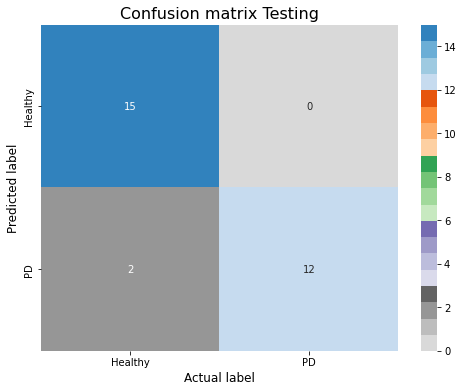

In [ ]:
report_generator(y_tst , test_predictions , 'Testing' , 5)

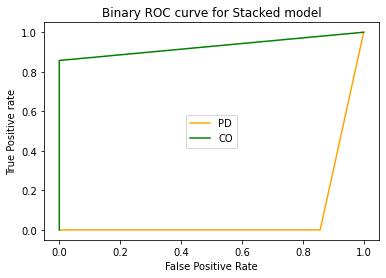

In [ ]:
roc_curve_pylot(y_tst , test_predictions , "Stacked model")

 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        62

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112

 
  
Training Accuracy   : 1.0
Training precision  : 1.0
Training recall     : 1.0
Training f1score    : 1.0
  


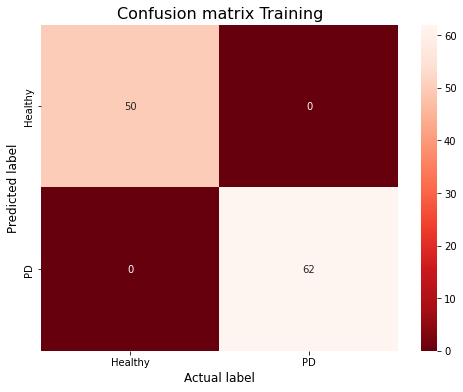

In [ ]:
test_predictions=clf.predict(X_trn)
report_generator(y_trn , test_predictions , 'Training' , 5)

GRAPHs

In [ ]:
data[1]

'/content/gdrive/MyDrive/vishal/gait-in-parkinsons-disease-1.0.0/GaPt15_10.txt'

In [ ]:
vgrf = pd.read_csv(data[1] , sep="\t" , names=["Time" , 'left_Vgrf0','left_Vgrf1','left_Vgrf2','left_Vgrf3', 'left_Vgrf4','left_Vgrf5','left_Vgrf6','left_Vgrf7','right_Vgrf0','right_Vgrf1','right_Vgrf2','right_Vgrf3','right_Vgrf4','right_Vgrf5','right_Vgrf6','right_Vgrf7','total_force_left','total_force_right'])

In [ ]:
st = []
for i in range(0,8):
  st.append("right_Vgrf" + str(i))

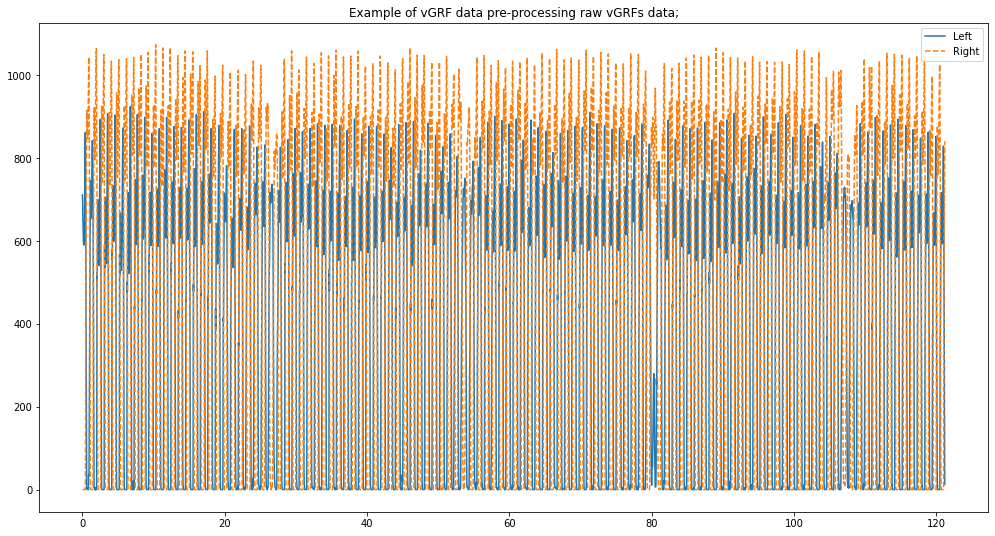

In [ ]:
import matplotlib.pyplot as plt
plt.rc('figure',figsize=(17,9))# Setting The Size of PLOT
x = np.array(vgrf['Time'])
y1 = np.array(vgrf['total_force_left'])
y2 = np.array(vgrf['total_force_right'])
plt.plot(x, y1, label = "Left")
plt.plot(x, y2, label = "Right", linestyle="--")
plt.title("Example of vGRF data pre-processing raw vGRFs data;")
plt.legend()
plt.show()

## Knowledge Graph

In [ ]:
!pip install --upgrade pandas
# For importing the .xls file into datafram first we have to upgrade the xlrd liberry and pandas liberary
!pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 3.1 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [ ]:
import pandas as pd
demographic = pd.read_excel(r'/content/gdrive/MyDrive/vishal/gait-in-parkinsons-disease-1.0.0/demographics.xls')

In [ ]:
# Check fro unique values and its value count in the Group coloumn fo the demographic dataframe
demographic.Group.value_counts()

PD    93
CO    73
Name: Group, dtype: int64

In [ ]:
# Checking for the unique columns in the demographic dataframe
demographic.columns

Index(['ID', 'Study', 'Group', 'Subjnum', 'Gender', 'Age', 'Height (meters)',
       'Weight (kg)', 'HoehnYahr', 'UPDRS', 'UPDRSM', 'TUAG',
       'Speed_01 (m/sec)', 'Speed_10'],
      dtype='object')

In [ ]:
# Checking if there is any null value in the demographic dataframe and we found there are some null values in some columns
demographic.isnull().sum()

ID                    0
Study                 0
Group                 0
Subjnum               0
Gender                0
Age                   0
Height (meters)       3
Weight (kg)           3
HoehnYahr            55
UPDRS                31
UPDRSM               31
TUAG                 13
Speed_01 (m/sec)      1
Speed_10            146
dtype: int64

In [ ]:
# imputing the null values with median
demographic = demographic.fillna(demographic.median())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [ ]:
# Checking if there is any null value in the demographic dataframe after imputing with median
demographic.isnull().sum()

ID                  0
Study               0
Group               0
Subjnum             0
Gender              0
Age                 0
Height (meters)     0
Weight (kg)         0
HoehnYahr           0
UPDRS               0
UPDRSM              0
TUAG                0
Speed_01 (m/sec)    0
Speed_10            0
dtype: int64

In [ ]:
def age(gender , value):
  if gender == 'male' and value <=60:
    return '''male 
     with
  age < 60'''
  elif gender == 'female' and value <60:
    return '''Female 
    with 
  age < 60'''
  elif gender == 'male' and value >60:
    return '''male 
    with 
  age > 60'''
  else:
    return '''female
     with 
  age > 60'''

In [ ]:
demographic['age'] = demographic.apply(lambda x: age(x["Gender"], x["Age"]), axis=1)

*Knowledge Graph for demographic data dhowing the relation between entities such as age , group , gender .*

In [ ]:
import networkx as nx
G = nx.DiGraph(directed=True)

In [ ]:
G = nx.from_pandas_edgelist(demographic,'age','ID','Group')

In [ ]:
color_map = []
for node in G:
    if len(node) < 10:
        color_map.append('pink')
    else: 
        color_map.append('yellow')

Text(0.5, 1.0, 'Knowledge graph of healthy and PD patient')

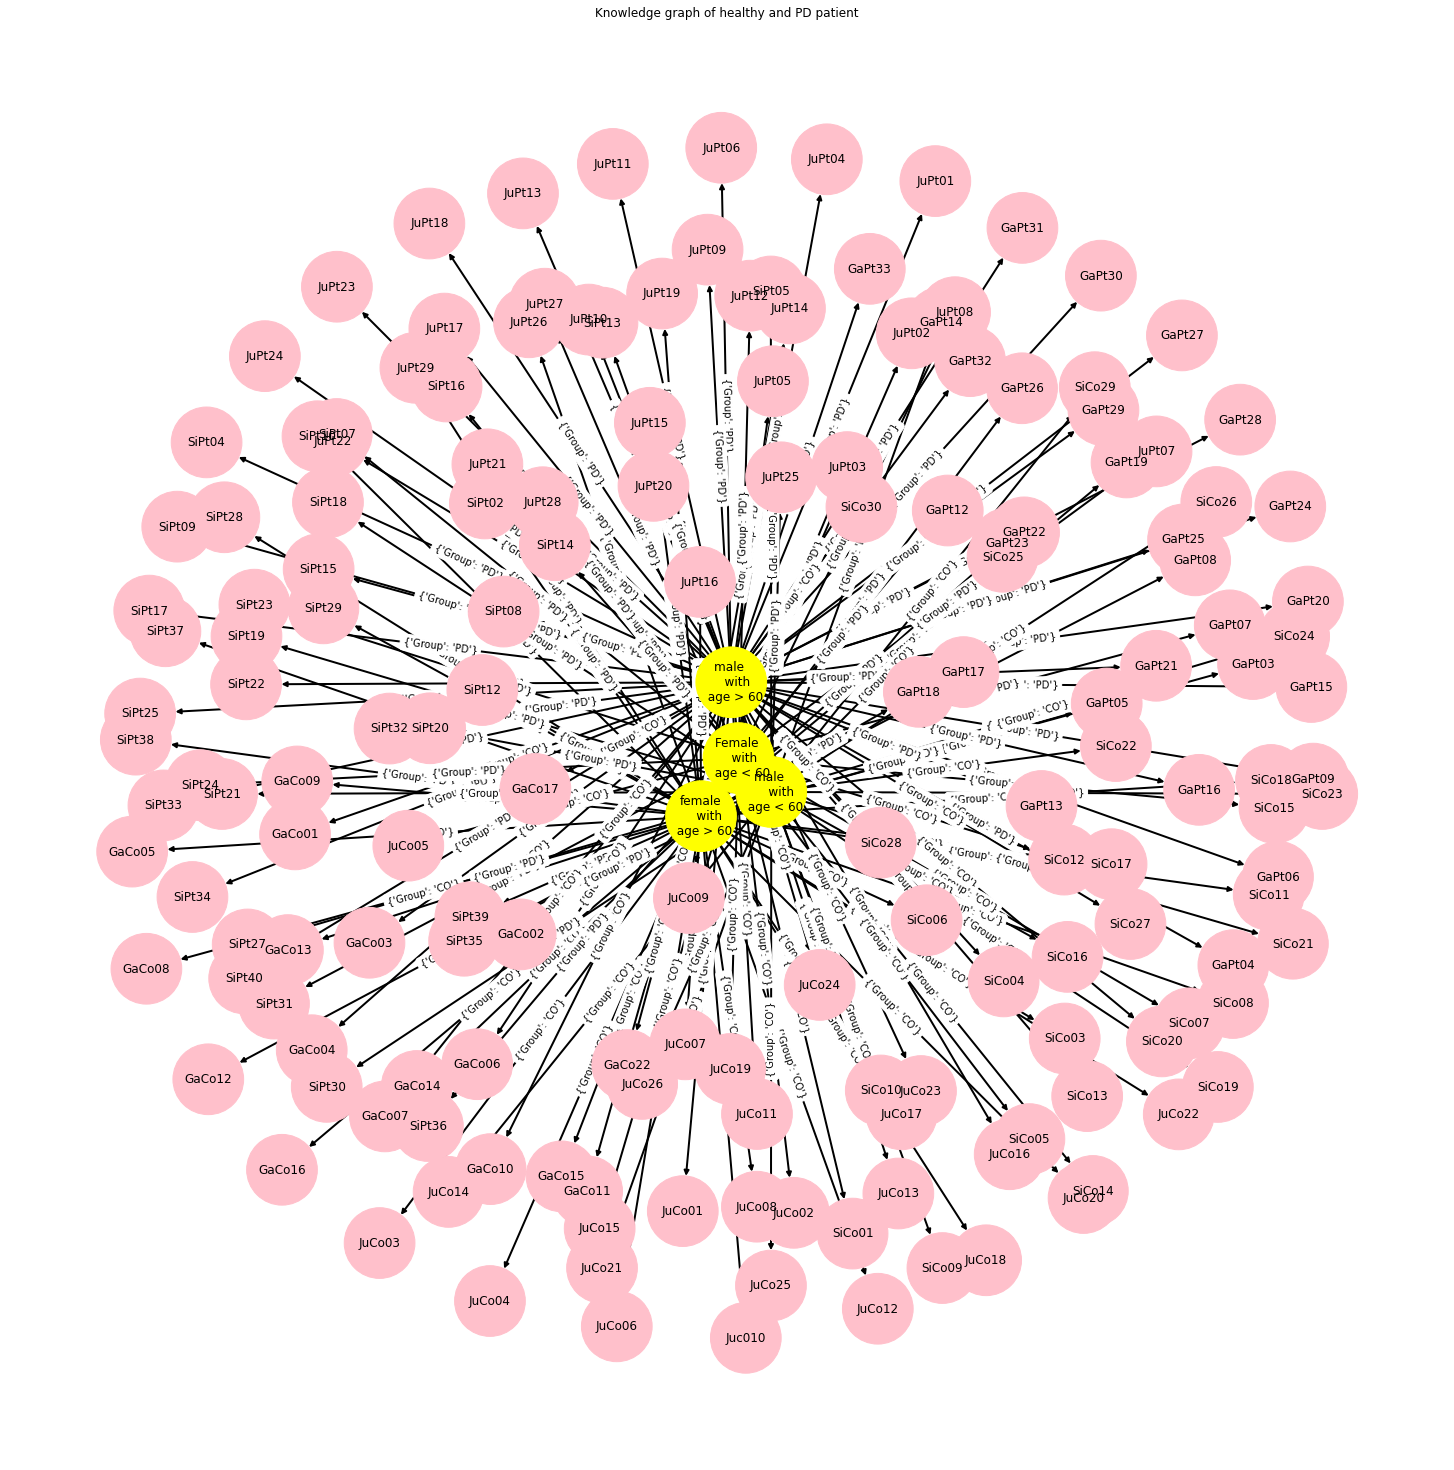

In [ ]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
figure(figsize=(20,20))

design_cfull = {
    'node_color': color_map,
    'node_size': 5000,
    'width': 2

}

nx.draw_kamada_kawai(G, with_labels=True ,arrows=True, **design_cfull)
nx.draw_networkx_edge_labels(G , pos=nx.kamada_kawai_layout(G))
plt.title("Knowledge graph of healthy and PD patient")